In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
import tensorflow as tf
import os

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = "/content/drive/MyDrive/data/test"

In [ ]:
image_exts = ["jped","jpg","bmp","png"]

In [ ]:
image_exts[2]

'bmp'

In [ ]:
os.listdir(data_dir)

['dogs', 'cats']

In [ ]:
img = cv2.imread(os.path.join(data_dir,"1.jpg"))

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

dogs
cats


In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in ext list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))
      os.remove(image_path)

LOAD DATA

In [ ]:
tf.data.Dataset??

In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory

<function keras.src.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [ ]:
data = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/data")

Found 557 files belonging to 3 classes.


In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
#Get another batch from the iterator
batch = data_iterator.next()

In [ ]:
batch

(array([[[[ 57.819336 ,  71.819336 ,  58.819336 ],
          [ 52.708008 ,  68.70801  ,  55.708008 ],
          [ 47.75293  ,  66.40918  ,  52.19043  ],
          ...,
          [180.77051  , 152.29883  , 128.40137  ],
          [164.86133  , 139.86133  , 109.86133  ],
          [198.78711  , 175.78711  , 143.21094  ]],
 
         [[ 55.6875   ,  69.6875   ,  56.6875   ],
          [ 48.875    ,  64.875    ,  51.875    ],
          [ 45.67871  ,  64.33496  ,  50.11621  ],
          ...,
          [207.96777  , 180.31152  , 153.53027  ],
          [158.68555  , 133.68555  , 103.68555  ],
          [214.73145  , 191.73145  , 160.73145  ]],
 
         [[ 54.9375   ,  68.9375   ,  55.9375   ],
          [ 50.       ,  66.       ,  53.       ],
          [ 45.34375  ,  64.       ,  49.78125  ],
          ...,
          [152.04395  , 124.606445 ,  95.2168   ],
          [178.25098  , 152.25098  , 125.25098  ],
          [200.20215  , 176.20215  , 150.27051  ]],
 
         ...,
 
         [[ 

In [ ]:
len(batch)

2

In [ ]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# Class 0 = cats
# Class 1 = dogs
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

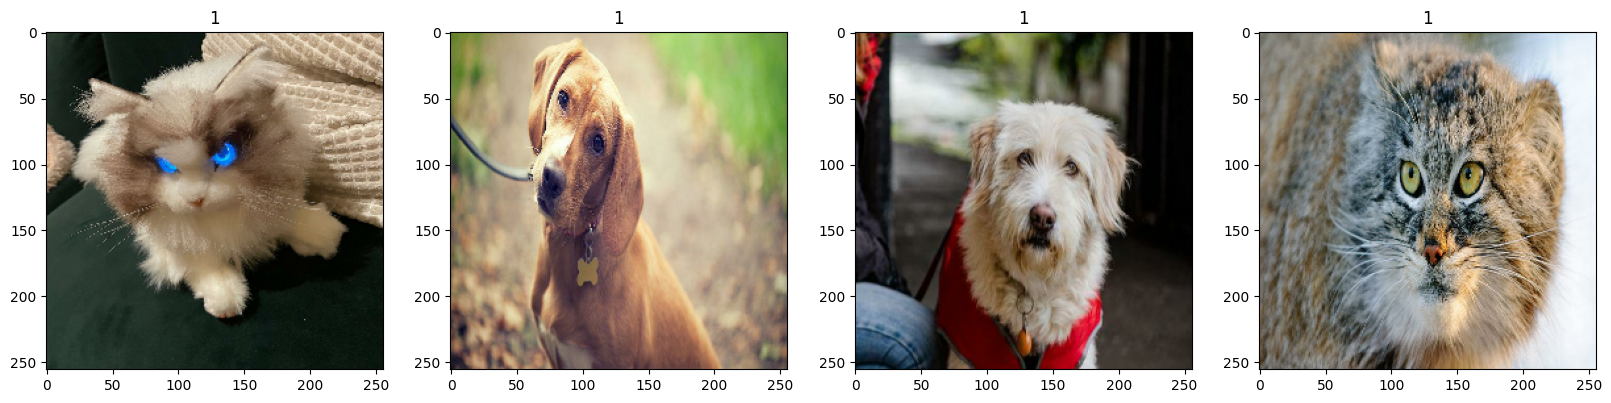

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled = batch[0].max()/255

In [ ]:
scaled.max()

1.0

PREPROCESS DATA

2.1 Scale data

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

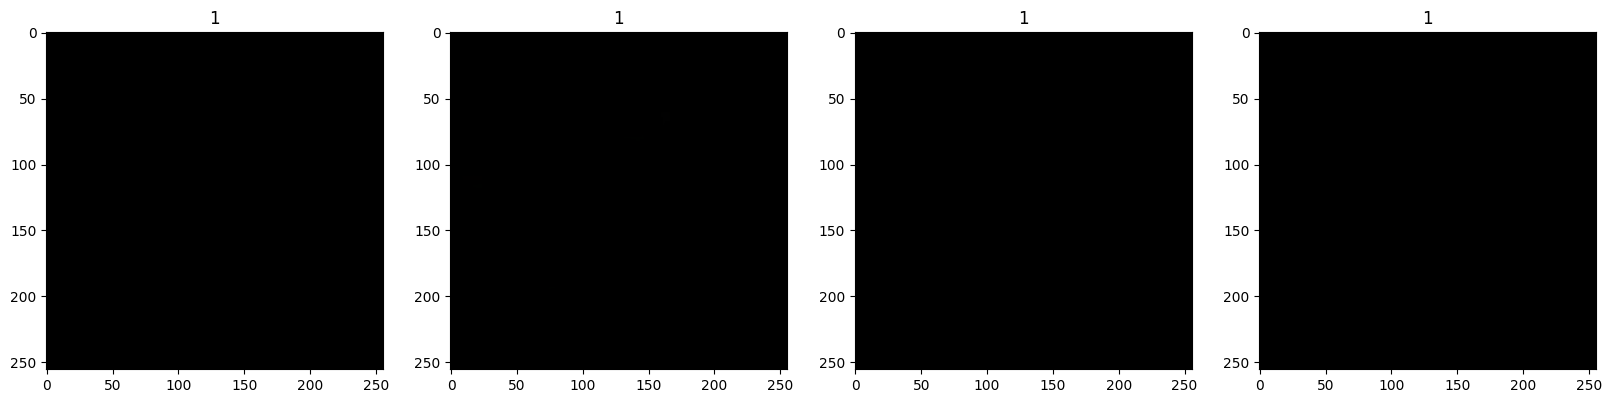

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

18

In [ ]:
train_size = int(len(data)*0.7)+1
val_size = int(len(data)*0.2)
test_size = int(len(data)*.1)+1

In [ ]:
train_size+val_size+test_size

18

In [ ]:
test_size

2

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

2

3. Deep Model

In [ ]:
import numpy as np

# Example: Creating a dummy batch of data with shape (batch_size, 256, 256, 3)
batch_size = 32
dummy_data = np.random.random((batch_size, 256, 256, 3))
dummy_labels = np.random.randint(2, size=(batch_size, 1))

# Ensure your data pipeline produces data with the correct shape
print("Input data shape:", dummy_data.shape)
print("Labels shape:", dummy_labels.shape)


Input data shape: (32, 256, 256, 3)
Labels shape: (32, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Adding the first Conv2D layer with input shape specified
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# Adding the second Conv2D layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())

# Adding the third Conv2D layer
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())

# Flattening the output of the last Conv2D layer
model.add(Flatten())

# Adding a Dense layer
model.add(Dense(256, activation='relu'))

# Adding the output layer
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss=tf.losses.BinaryFocalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0

TRAIN

In [ ]:
logdir = "/content/drive/MyDrive/data"

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
13/13 [==============================] - 37s 2s/step - loss: 0.0157 - accuracy: 0.9231 - val_loss: 2.9709e-07 - val_accuracy: 1.0000
Epoch 2/20
13/13 [==============================] - 34s 2s/step - loss: 3.2057e-13 - accuracy: 1.0000 - val_loss: 7.6476e-17 - val_accuracy: 1.0000
Epoch 3/20
13/13 [==============================] - 38s 3s/step - loss: 2.8659e-16 - accuracy: 1.0000 - val_loss: 4.2121e-18 - val_accuracy: 1.0000
Epoch 4/20
13/13 [==============================] - 34s 3s/step - loss: 2.5695e-10 - accuracy: 1.0000 - val_loss: 7.7990e-24 - val_accuracy: 1.0000
Epoch 5/20
13/13 [==============================] - 33s 2s/step - loss: 1.9886e-10 - accuracy: 1.0000 - val_loss: 3.6612e-21 - val_accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 37s 3s/step - loss: 4.9408e-17 - accuracy: 1.0000 - val_loss: 1.1444e-21 - val_accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 33s 2s/step - loss: 1.8504e-10 - accuracy: 1.0000 - val_loss: 2.

PLOT PERFORMANCE

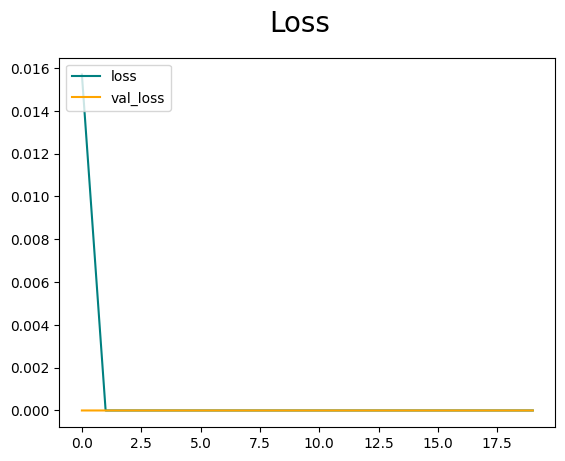

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(dummy_data, dummy_labels, epochs=10, batch_size=batch_size)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 15.3019 - accuracy: 0.6250
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 8.0403 - accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 4.0262 - accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 1.3865 - accuracy: 0.6250
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.7462 - accuracy: 0.3750
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.7462 - accuracy: 0.3750
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.7372 - accuracy: 0.3750
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 0.7211 - accuracy: 0.3750
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.7036 - accuracy: 0.3750
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 0.6877 - accuracy: 0.6250
